<a href="https://colab.research.google.com/github/akash02ita/CPSC-599.6-DL-for-Vision/blob/proj/proj/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -r myrepo
!git clone --branch proj https://github.com/akash02ita/CPSC-599.6-DL-for-Vision.git myrepo
!cp myrepo/proj/CustomDataset.ipynb .

Cloning into 'myrepo'...
remote: Enumerating objects: 141, done.
remote: Counting objects: 100% (141/141), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 141 (delta 15), reused 23 (delta 0), pack-reused 0
Receiving objects: 100% (141/141), 24.48 MiB | 14.37 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [2]:
__BACKUP__NAME__ = __name__
__name__ = "NOT MAIN" # import jupyter methods without running test scripts
%run CustomDataset.ipynb
__name__ = __BACKUP__NAME__

# Setup Custom Dataset

In [3]:
from google.colab import drive
import shutil, zipfile

if __name__ == "__main__":
  # Mount the folder
  drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Setup handwritten text database

In [4]:
DATASET_PATH = "/content/drive/MyDrive/599 Project/custom-dataset-script"

handwritten_zip_path = "/content/drive/MyDrive/599 Project/custom-dataset-script/handwritten-text-images-database.zip"
extract_zip_to(handwritten_zip_path, ".")

'.'

In [5]:
# 'en_test' folder not present.
# train_handwritten = TextDataset("database/en_train_filtered", "database/en_train_filtered/labels.csv")
# val_handwritten = TextDataset("database/en_val", "database/en_val/labels.csv")

# split the texts into training, validation and test (60, 20, 20)
handwritten_textdataset = TextDataset("database/en_train_filtered", "database/en_train_filtered/labels.csv")
print(len(handwritten_textdataset))

19999


## Setup printed text database

In [6]:
"""
!pip install english-words
from english_words import get_english_words_set
!pip install essential_generators
from essential_generators import DocumentGenerator
"""
!pip install nltk
import nltk
nltk.download('words')
from nltk.corpus import words
from random import sample

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [7]:
# https://stackoverflow.com/questions/55200307/generate-a-string-of-n-random-english-words-with-nltk-python
def random_sentence(n):
    return ' '.join(sample(words.words(), n)) # calling it too many times is  inefficient
    # maybe better to use a prexisting word database (althougt not neeeded as sentences.txt has already been generated, and only once is required)

In [8]:
import random, shutil
# GENERATE_SENTENCES = input("Do you want to generate sentences? (y/n) ") == "y"
GENERATE_SENTENCES = False # already generated before. Hardcode to false to be safe
PRINTED_TEXTS_PATH = DATASET_PATH # "/content/drive/MyDrive/599 Project/custom-dataset-script"
class Sentence:
  def __init__(self, tot_sentences=1, min_length=1, max_length=3):
    assert 1 <= min_length <= max_length
    # initialize sentences
    self.tot_sentences = tot_sentences
    self.sentences = [""]*tot_sentences
    for i in range(tot_sentences):
      sentence_length = random.randint(min_length,max_length)
      self.sentences[i] = random_sentence(sentence_length)
  def __len__(self):
    return self.tot_sentences
  def __getitem__(self, i):
    return self.sentences[i]
  def __str__(self):
    return str(self.sentences)

if GENERATE_SENTENCES:
  texts = Sentence(10000)
  # texts = Sentence(100)
  print("total sentences:", len(texts))
  # print(texts)

  # export to file
  with open('sentences.txt', 'w') as file:
    for sentence in texts:
      file.write(sentence+"\n")
  # copy file to drive
  shutil.copy("sentences.txt", PRINTED_TEXTS_PATH)

# copy file from drive
shutil.copy(os.path.join(DATASET_PATH, "sentences.txt"),".")

'./sentences.txt'

In [9]:
with open('sentences.txt', 'r') as file:
  texts = list(map(lambda t: t.rstrip('\n'), file.readlines()))

# split the texts into training, validation and test (60, 20, 20)
from torch.utils.data import random_split

train_size = int(0.6 * len(texts))
val_size = int(0.2 * len(texts))
test_size = len(texts) - train_size - val_size

sentences = texts
print(len(sentences))

10000


In [10]:
# setup one font
extract_zip_to("/content/drive/MyDrive/599 Project/custom-dataset-script/fonts/roboto.zip", "./fonts")
FONT_PATH =  "./fonts/Roboto-Regular.ttf"

# GENERATE_PRINTED_IMAGES = input("Do you want to generate printed images? (y/n) ") == "y"
GENERATE_PRINTED_IMAGES = False # from now and on, to directly extract instead of re-generating

import shutil, os
def zip_to(src, dest):
  # create zip file with the nested folder as the folder `src`
  # so that when extracting `src` folder is extracted instead of `src/*` files
  shutil.make_archive(dest, 'zip', ".", src)


if GENERATE_PRINTED_IMAGES:
  # generate printed images
  generatePrintedImages("printed_text_dataset", FONT_PATH, sentences)

  # zip and save all them on drive
  zip_to("printed_text_dataset", os.path.join(DATASET_PATH, "printed_text_dataset"))  

# extract zip files from drive 
print(os.listdir(DATASET_PATH))
extract_zip_to(os.path.join(DATASET_PATH, "printed_text_dataset.zip"), ".")
print(os.listdir(DATASET_PATH))

['handwritten-text-images-database.zip', 'handwritten-text-images-labels.csv', 'sample images', 'fonts', 'Custom Dataset.ipynb', 'sentences.txt', 'train_text_printed.zip', 'val_text_printed.zip', 'test_text_printed.zip', 'printed_text_dataset.zip', 'covid_ctscan_dataset.zip']
['handwritten-text-images-database.zip', 'handwritten-text-images-labels.csv', 'sample images', 'fonts', 'Custom Dataset.ipynb', 'sentences.txt', 'train_text_printed.zip', 'val_text_printed.zip', 'test_text_printed.zip', 'printed_text_dataset.zip', 'covid_ctscan_dataset.zip']


In [11]:
# split the texts into training, validation and test (60, 20, 20)
printed_textdataset = TextDataset("printed_text_dataset", "printed_text_dataset/labels.csv")
print(len(printed_textdataset))

40000


40001
hardship hypothecal glaciology


although twentiethly aliped


Lampyridae


multipole cycloscope autogamy


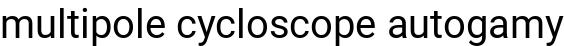

In [12]:
!ls printed_text_dataset/ | wc -l
print(printed_textdataset[0][1])
printed_textdataset[0][0].show()
print(printed_textdataset[1][1])
printed_textdataset[1][0].show()
print(printed_textdataset[2][1])
printed_textdataset[2][0].show()
print(printed_textdataset[3][1])
printed_textdataset[3][0].show()

## Create custom dataset

In [13]:
# get orignal images: https://www.kaggle.com/datasets/plameneduardo/sarscov2-ctscan-dataset?resource=download
extract_zip_to(os.path.join(DATASET_PATH, "covid_ctscan_dataset.zip"),".")
!mv COVID "original_images" || rm -r "original_images"; mv COVID "original_images" 
!rm -r non-COVID
!ls original_images | wc -l

mv: cannot stat 'COVID': No such file or directory
1253


In [14]:
from torchvision import transforms
import torch
transform = transforms.Compose(
    [
        lambda x: x.convert("RGB"), # FORCE pil image to be on same mode! Or it causes error in model training
        # lambda x: x.convert("RGBA"), # training fails with 4 channels, resnet18!
        # transforms.CenterCrop((500, 500)),
        # transforms.Resize(224), # loses quality of image (text)
        transforms.Resize((500,500)),
        # transforms.Resize((224,224)),   # tested but makes it worse accuracy (~60% compared to attempt1)
        transforms.RandomApply([transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1)], p=0.5),
        transforms.RandomGrayscale(p=0.1),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
     ])


In [15]:
# in custom dataset assertion error is caused by fact that random_split creates new instance type
label_encoder = {"None": 0, "P": 1, "H": 2, "PH": 3}
label_decoder = {value:key for key,value in label_encoder.items()}
print(label_decoder)
dataset = CustomDataset("original_images", printed_textdataset, handwritten_textdataset, labelmode="texttype", label_encoder=label_encoder, transform=transform)
train_size = int(0.6 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])
print(len(dataset))
print(len(train_dataset),len(val_dataset),len(test_dataset), "--", sum([len(train_dataset),len(val_dataset),len(test_dataset)]))

{0: 'None', 1: 'P', 2: 'H', 3: 'PH'}
4204
2522 840 842 -- 4204


0


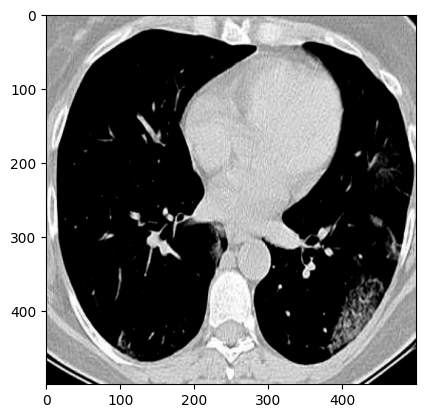

In [16]:
from matplotlib import pyplot as plt
print(dataset[0][1])
image = torch.permute(dataset[0][0], (1, 2, 0)).numpy()
plt.imshow(image)

1
torch.Size([3, 500, 500])


'RGB'

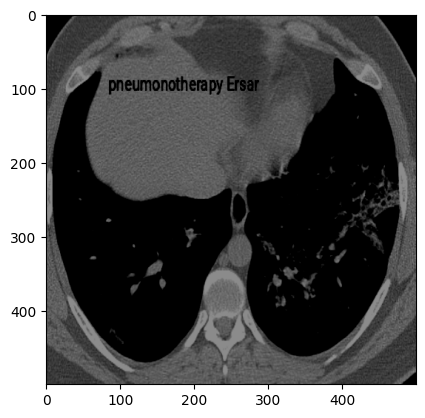

In [17]:
print(dataset[10][1])
image1 = dataset[10][0]
print(image1.shape) # (3,x,y) always or (4,x,y) always. If both occur among different images then model will fail to train (outputs error)
image1 = torch.permute(image1, (1, 2, 0)).numpy()
plt.imshow(image1)

path = dataset.image_paths[10][0]
from PIL import Image
Image.open(path).mode # pil seems to open image in either rgb or rgba mode.

# Model

In [18]:
import numpy as np

import torch
from torch import nn
from torch import optim

import torchvision
from torchvision import datasets, transforms
from torchvision import datasets, transforms, models

import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split
from matplotlib import pyplot as plt


## model setup

In [19]:
phases = {
    'train': train_dataset,
    'val': val_dataset,
    'test': test_dataset
    }
loader = {
    phase: DataLoader(ds, batch_size=64, shuffle=(phase=='train'))
    for phase, ds in phases.items()
}

In [20]:
def freeze(model):
  for param in model.parameters():
    param.requires_grad = False

# unfreeze the parameters of the first layer
def unfreeze(model):
  for param in model.layer1.parameters():
    param.requires_grad = True

In [21]:
num_classes = 4  # None P H PH
model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
freeze_features = True
if freeze_features:
  freeze(model)

model.fc = nn.Linear(num_features, num_classes)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [22]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
print(device)

cuda


In [23]:
def evaluate(model, loader, device, criterion, mode='validation'):
  model.eval()
  total_correct = 0
  total_loss = 0
  total = 0
  for i, (images, labels) in enumerate(loader[mode]):
    images = images.to(device)
    labels = labels.to(device)
    with torch.no_grad():
      outputs = model(images)
      loss = criterion(outputs, labels)
      total_loss += loss.item() * images.size(0)
      total += images.size(0)
      _, predictions = outputs.max(1)
      total_correct += (labels == predictions).sum()
  loss = total_loss / total
  accuracy = total_correct / total
  print(f'{mode} epoch {epoch}: Loss({loss:6.4f}) Accuracy ({accuracy:6.4f})')

## model training

In [24]:
model = model.to(device)
epochs = 20
for epoch in range(epochs):
  model.train()
  total = 0
  total_correct = 0
  total_loss = 0
  for i, (images, labels) in enumerate(loader['train']):
    images = images.to(device)
    labels = labels.to(device)
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    total += images.size(0)
    _, predictions = outputs.max(1)
    total_correct += (predictions == labels).sum()
    total_loss += loss.item() * images.size(0)
  accuracy = total_correct / total
  loss = total_loss / total
  print(f'Train epoch {epoch}: Loss({loss:6.4f}) Accuracy ({accuracy:6.4f})')
  evaluate(model, loader, device, criterion, mode='val')

Train epoch 0: Loss(1.3033) Accuracy (0.4088)
val epoch 0: Loss(1.2864) Accuracy (0.3738)
Train epoch 1: Loss(0.9263) Accuracy (0.6047)
val epoch 1: Loss(0.8884) Accuracy (0.6357)
Train epoch 2: Loss(0.8541) Accuracy (0.6435)
val epoch 2: Loss(0.9035) Accuracy (0.6286)
Train epoch 3: Loss(0.6882) Accuracy (0.7308)
val epoch 3: Loss(0.6505) Accuracy (0.7607)
Train epoch 4: Loss(0.6896) Accuracy (0.7288)
val epoch 4: Loss(0.6551) Accuracy (0.7536)
Train epoch 5: Loss(0.6320) Accuracy (0.7494)
val epoch 5: Loss(0.6288) Accuracy (0.7607)
Train epoch 6: Loss(0.6300) Accuracy (0.7542)
val epoch 6: Loss(0.7201) Accuracy (0.6905)
Train epoch 7: Loss(0.6836) Accuracy (0.7280)
val epoch 7: Loss(0.6042) Accuracy (0.7631)
Train epoch 8: Loss(0.6300) Accuracy (0.7435)
val epoch 8: Loss(0.5920) Accuracy (0.7738)
Train epoch 9: Loss(0.5843) Accuracy (0.7839)
val epoch 9: Loss(0.8825) Accuracy (0.6833)
Train epoch 10: Loss(0.5776) Accuracy (0.7807)
val epoch 10: Loss(0.6172) Accuracy (0.7798)
Train ep

## model evaluation

In [25]:
evaluate(model, loader, device, criterion, mode='test')

test epoch 19: Loss(0.6552) Accuracy (0.7577)
